<a href="https://colab.research.google.com/github/NicoPerotto/challenge2-data-science-LATAM/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importación y procedimientos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

##Procedimiento para mejorar la visualziacion de datos

In [2]:
def info(df):
    print(f"{'#':<3} {'Columna':<20} {'Tipo':<12} {'Indet.':<10} {'Valores Únicos / Ejemplo'}")
    print("-" * 90)

    for i, col in enumerate(df.columns):
        dtype = str(df[col].dtype)

        # 1. Conteo de vacíos (usamos apply para evitar errores de tipo)
        # Esto cuenta nulos reales, espacios y strings vacíos de forma segura
        vacios = df[col].apply(lambda x: x in ['', ' ', np.nan, None]).sum()

        try:
            # 2. Intentamos sacar valores únicos
            valores = df[col].unique().tolist()

            if len(valores) < 10:
                resumen = f"{valores}"
            else:
                resumen = f"{len(valores)} valores diferentes"
        except TypeError:
            # 3. Si falla por tener diccionarios/listas, damos un resumen alternativo
            resumen = "[Contiene diccionarios o listas]"

        print(f"{i:<3} {col:<20} {dtype:<12} {vacios:<10} {resumen}")

    print("-" * 90)
    filas, columnas = df.shape
    memoria = df.memory_usage(deep=True).sum() / (1024 ** 2) # Convertir a MB

    print(f"Tamaño total: {filas} filas y {columnas} columnas")

#📌 Extracción

In [3]:
dataFrame = pd.read_json('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')
dataFrame.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

 ## Comprender la estructura del dataset y el significado de sus columnas.

In [4]:
info(dataFrame)

#   Columna              Tipo         Indet.     Valores Únicos / Ejemplo
------------------------------------------------------------------------------------------
0   customerID           object       0          7267 valores diferentes
1   Churn                object       224        ['No', 'Yes', '']
2   customer             object       0          [Contiene diccionarios o listas]
3   phone                object       0          [Contiene diccionarios o listas]
4   internet             object       0          [Contiene diccionarios o listas]
5   account              object       0          [Contiene diccionarios o listas]
------------------------------------------------------------------------------------------
Tamaño total: 7267 filas y 6 columnas


In [5]:
columnas_a_normalizar = list(dataFrame.columns)
columnas_a_normalizar.remove('customerID')
columnas_a_normalizar.remove('Churn')

for col in columnas_a_normalizar:
    # Creamos el dataframe temporal normalizado
    temp_df = pd.json_normalize(dataFrame[col])
    dataFrame = pd.concat([dataFrame.drop(columns=[col]), temp_df], axis=1)
dataFrame.set_index('customerID', inplace=True)
dataFrame.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
customerID,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## Verificar si hay problemas en los datos que puedan afectar el análisis.

In [6]:
dataFrame = dataFrame.convert_dtypes()
info(dataFrame)

#   Columna              Tipo         Indet.     Valores Únicos / Ejemplo
------------------------------------------------------------------------------------------
0   Churn                string       224        ['No', 'Yes', '']
1   gender               string       0          ['Female', 'Male']
2   SeniorCitizen        Int64        0          [0, 1]
3   Partner              string       0          ['Yes', 'No']
4   Dependents           string       0          ['Yes', 'No']
5   tenure               Int64        0          73 valores diferentes
6   PhoneService         string       0          ['Yes', 'No']
7   MultipleLines        string       0          ['No', 'Yes', 'No phone service']
8   InternetService      string       0          ['DSL', 'Fiber optic', 'No']
9   OnlineSecurity       string       0          ['No', 'Yes', 'No internet service']
10  OnlineBackup         string       0          ['Yes', 'No', 'No internet service']
11  DeviceProtection     string       0          ['

##Entendiendo datos vacios

In [7]:
churn_nan = dataFrame[dataFrame['Churn'].isin(['', ' ', np.nan, None])].copy()
info(churn_nan)

#   Columna              Tipo         Indet.     Valores Únicos / Ejemplo
------------------------------------------------------------------------------------------
0   Churn                string       224        ['']
1   gender               string       0          ['Female', 'Male']
2   SeniorCitizen        Int64        0          [0, 1]
3   Partner              string       0          ['No', 'Yes']
4   Dependents           string       0          ['No', 'Yes']
5   tenure               Int64        0          64 valores diferentes
6   PhoneService         string       0          ['Yes', 'No']
7   MultipleLines        string       0          ['Yes', 'No', 'No phone service']
8   InternetService      string       0          ['Fiber optic', 'No', 'DSL']
9   OnlineSecurity       string       0          ['Yes', 'No internet service', 'No']
10  OnlineBackup         string       0          ['No', 'No internet service', 'Yes']
11  DeviceProtection     string       0          ['No', 'No inte

In [8]:
chargesTotal_nan = dataFrame[dataFrame['Charges.Total'].isin(['', ' ', np.nan, None])].copy()
info(chargesTotal_nan)

#   Columna              Tipo         Indet.     Valores Únicos / Ejemplo
------------------------------------------------------------------------------------------
0   Churn                string       0          ['No']
1   gender               string       0          ['Female', 'Male']
2   SeniorCitizen        Int64        0          [0]
3   Partner              string       0          ['Yes', 'No']
4   Dependents           string       0          ['Yes']
5   tenure               Int64        0          [0]
6   PhoneService         string       0          ['No', 'Yes']
7   MultipleLines        string       0          ['No phone service', 'No', 'Yes']
8   InternetService      string       0          ['DSL', 'No']
9   OnlineSecurity       string       0          ['Yes', 'No internet service', 'No']
10  OnlineBackup         string       0          ['Yes', 'No internet service', 'No']
11  DeviceProtection     string       0          ['Yes', 'No internet service', 'No']
12  TechSupport   

In [9]:
tenure_zero = dataFrame[dataFrame['tenure'] == 0].copy()
info(tenure_zero)

#   Columna              Tipo         Indet.     Valores Únicos / Ejemplo
------------------------------------------------------------------------------------------
0   Churn                string       0          ['No']
1   gender               string       0          ['Female', 'Male']
2   SeniorCitizen        Int64        0          [0]
3   Partner              string       0          ['Yes', 'No']
4   Dependents           string       0          ['Yes']
5   tenure               Int64        0          [0]
6   PhoneService         string       0          ['No', 'Yes']
7   MultipleLines        string       0          ['No phone service', 'No', 'Yes']
8   InternetService      string       0          ['DSL', 'No']
9   OnlineSecurity       string       0          ['Yes', 'No internet service', 'No']
10  OnlineBackup         string       0          ['Yes', 'No internet service', 'No']
11  DeviceProtection     string       0          ['Yes', 'No internet service', 'No']
12  TechSupport   

###
  1 - No se detecta correlación en los "churn" Indeterminados. Se procede a eliminar esas filas porque no aportan datos utiles para el análisis.

  2 - Se observa una correlacion entre "tenure" igual a 0 y "Charge.Total" vacio. Se procede a rellenarlo con 0.

  3- 'No internet service' y 'No phone service' presenta Multicolinealidad se modificará a No

  4- El formato Charges.Total debe ser Float

##Manejo de inconsistencias

In [10]:
#Trasnformando vacios a np.nan
dataFrame = dataFrame.replace(r'^\s*$', np.nan, regex=True)
#Trasformando 'No internet service' y 'No phone service' (Multicolinealidad) a No
dataFrame = dataFrame.replace('No internet service', 'No')
dataFrame = dataFrame.replace('No phone service', 'No')

#Eliminado filas donde Churn es vacio
dataFrame.dropna(subset=['Churn'], inplace=True)
dataFrame.reset_index(drop=True, inplace=True)

#Transformando 'Charges.Total' en float64
dataFrame['Charges.Total'] = pd.to_numeric(dataFrame['Charges.Total'], errors='coerce')
#Transformando Charges.Total vacios a 0
dataFrame['Charges.Total'] = dataFrame['Charges.Total'].fillna(0)

dataFrame['Charges.Total'] = dataFrame['Charges.Total'].astype('Float64')
info(dataFrame)

#   Columna              Tipo         Indet.     Valores Únicos / Ejemplo
------------------------------------------------------------------------------------------
0   Churn                string       0          ['No', 'Yes']
1   gender               string       0          ['Female', 'Male']
2   SeniorCitizen        Int64        0          [0, 1]
3   Partner              string       0          ['Yes', 'No']
4   Dependents           string       0          ['Yes', 'No']
5   tenure               Int64        0          73 valores diferentes
6   PhoneService         string       0          ['Yes', 'No']
7   MultipleLines        string       0          ['No', 'Yes']
8   InternetService      string       0          ['DSL', 'Fiber optic', 'No']
9   OnlineSecurity       string       0          ['No', 'Yes']
10  OnlineBackup         string       0          ['Yes', 'No']
11  DeviceProtection     string       0          ['No', 'Yes']
12  TechSupport          string       0          ['Yes', '

##Creación de nueva columna para obtener los cargos por dia


In [11]:
dataFrame['Charges.Daily'] = dataFrame['Charges.Monthly'] / 30

##Transformación de variables categóricas

In [12]:
# Definimos el diccionario de mapeo
mapping = {'Yes': 1, 'No': 0}

for col in dataFrame.columns:
    unique_values = set(dataFrame[col].dropna().unique())

    # Verificamos que sea una columna de Yes/No
    if unique_values.issubset({'Yes', 'No'}) and len(unique_values) > 0:
        # Usamos Int64 (mayúscula) para mantener la consistencia
        dataFrame[col] = dataFrame[col].map(mapping).astype('Int64')

info(dataFrame)

#   Columna              Tipo         Indet.     Valores Únicos / Ejemplo
------------------------------------------------------------------------------------------
0   Churn                Int64        0          [0, 1]
1   gender               string       0          ['Female', 'Male']
2   SeniorCitizen        Int64        0          [0, 1]
3   Partner              Int64        0          [1, 0]
4   Dependents           Int64        0          [1, 0]
5   tenure               Int64        0          73 valores diferentes
6   PhoneService         Int64        0          [1, 0]
7   MultipleLines        Int64        0          [0, 1]
8   InternetService      string       0          ['DSL', 'Fiber optic', 'No']
9   OnlineSecurity       Int64        0          [0, 1]
10  OnlineBackup         Int64        0          [1, 0]
11  DeviceProtection     Int64        0          [0, 1]
12  TechSupport          Int64        0          [1, 0]
13  StreamingTV          Int64        0          [1, 0]
14

##Traducción de columnas


In [13]:
traducciones = {
    'Churn': 'evasión',
    'gender': 'genero',
    'SeniorCitizen': 'adulto_mayor',
    'Partner': 'tiene_pareja',
    'Dependents': 'dependientes',
    'tenure': 'antiguedad',
    'PhoneService': 'servicio_telefónico',
    'MultipleLines': 'multiples_lineas',
    'InternetService': 'internet',
    'OnlineSecurity': 'seguridad_online',
    'OnlineBackup': 'respaldo_en_la_nube',
    'DeviceProtection': 'proteccion_de_dispositivo',
    'TechSupport': 'soporte_tecnico',
    'StreamingTV': 'streaming_TV',
    'StreamingMovies': 'streaming_peliculas',
    'Contract': 'tipo_de_contrato',
    'PaperlessBilling': 'factura_digital',
    'PaymentMethod': 'metodo_de_pago',
    'Charges.Monthly': 'cargo_mensual',
    'Charges.Total': 'cargo_total',
    'Charges.Daily': 'cargo_diario'
}

dataFrame.rename(columns=traducciones, inplace=True)

# Verificamos el resultado
info(dataFrame)

#   Columna              Tipo         Indet.     Valores Únicos / Ejemplo
------------------------------------------------------------------------------------------
0   evasión              Int64        0          [0, 1]
1   genero               string       0          ['Female', 'Male']
2   adulto_mayor         Int64        0          [0, 1]
3   tiene_pareja         Int64        0          [1, 0]
4   dependientes         Int64        0          [1, 0]
5   antiguedad           Int64        0          73 valores diferentes
6   servicio_telefónico  Int64        0          [1, 0]
7   multiples_lineas     Int64        0          [0, 1]
8   internet             string       0          ['DSL', 'Fiber optic', 'No']
9   seguridad_online     Int64        0          [0, 1]
10  respaldo_en_la_nube  Int64        0          [1, 0]
11  proteccion_de_dispositivo Int64        0          [0, 1]
12  soporte_tecnico      Int64        0          [1, 0]
13  streaming_TV         Int64        0          [1, 

#📊 Carga y análisis

##Análisis descriptivo de los datos


In [14]:
dataFrame.describe()

,evasión,adulto_mayor,tiene_pareja,dependientes,antiguedad,servicio_telefónico,multiples_lineas,seguridad_online,respaldo_en_la_nube,proteccion_de_dispositivo,soporte_tecnico,streaming_TV,streaming_peliculas,factura_digital,cargo_mensual,cargo_total,cargo_diario
count,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0
mean,0.26537,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2279.734304,2.158723
std,0.441561,0.368612,0.499748,0.45811,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.79447,1.003002
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.25,0.0,0.608333
25%,0.0,0.0,0.0,0.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.5,398.55,1.183333
50%,0.0,0.0,0.0,0.0,29.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,70.35,1394.55,2.345
75%,1.0,0.0,1.0,1.0,55.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,89.85,3786.6,2.995
max,1.0,1.0,1.0,1.0,72.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,118.75,8684.8,3.958333


##Distribución general de cancelaciones

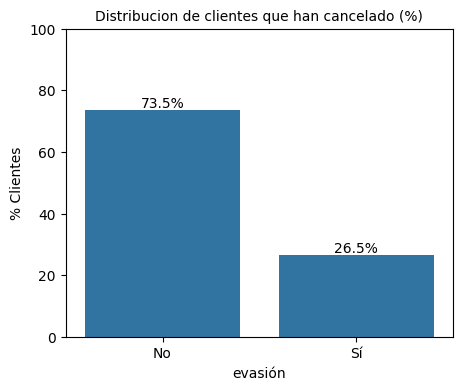

In [15]:
#Calculo de porcentajes
churn_cant = dataFrame['evasión'].value_counts()
churn_porcentaje = churn_cant / len(dataFrame) * 100

#Grafico de barras
plt.figure(figsize=(5, 4))
ax = sns.barplot(x=churn_porcentaje.index, y=churn_porcentaje.values)
plt.title('Distribucion de clientes que han cancelado (%)', fontsize=10)
plt.xlabel('evasión')
plt.ylabel('% Clientes')
plt.ylim(0, 100)
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

##Distribucion de cancelaciones por variables categoricas

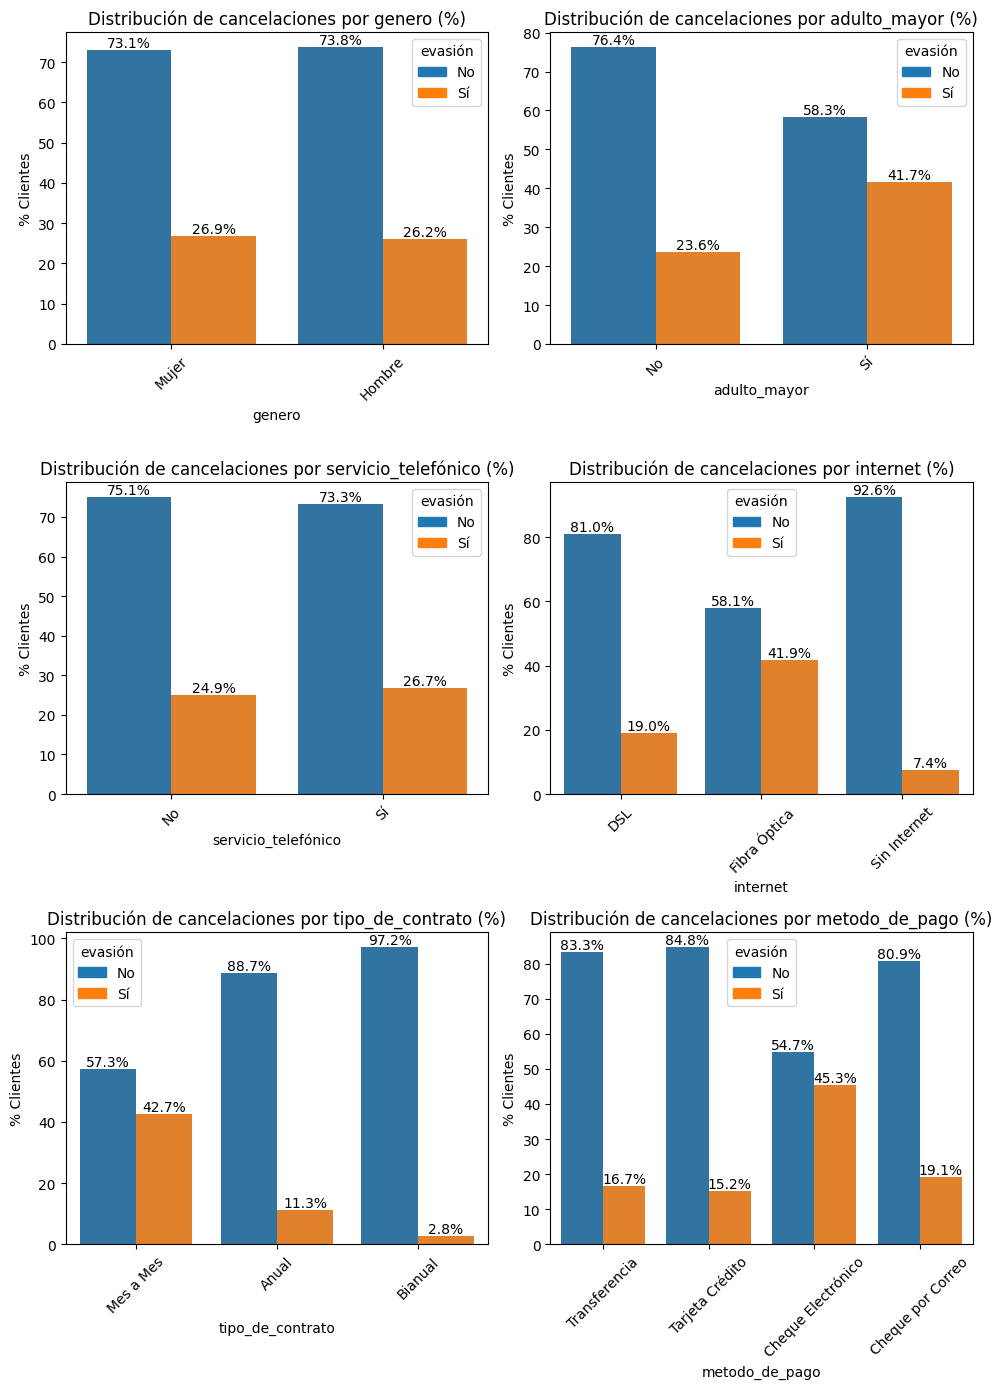

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(10, 14))
axes = axes.flatten()

columnas_cat = ['genero', 'adulto_mayor','servicio_telefónico','internet','tipo_de_contrato','metodo_de_pago']
traducciones_ticks = {
    'Female': 'Mujer', 'Male': 'Hombre',
    '1': 'Sí', '0': 'No',
    'DSL': 'DSL', 'Fiber optic': 'Fibra Óptica', 'No': 'Sin Internet',
    'Month-to-month': 'Mes a Mes', 'One year': 'Anual', 'Two year': 'Bianual',
    'Electronic check': 'Cheque Electrónico', 'Mailed check': 'Cheque por Correo',
    'Bank transfer (automatic)': 'Transferencia', 'Credit card (automatic)': 'Tarjeta Crédito'
}

# Definir paleta de colores para las leyendas
legend_handles = [
    mpatches.Patch(color=sns.color_palette('tab10')[0], label='No'),
    mpatches.Patch(color=sns.color_palette('tab10')[1], label='Sí'),
]

for i, col in enumerate(columnas_cat):

    # Caclculo de porcentaje por categorías
    churn_percentage = dataFrame.groupby(col)['evasión'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()

    # Creacion de gráficos
    ax = sns.barplot(data=churn_percentage, x=col, y='percentage', hue='evasión', ax=axes[i], palette='tab10')
    axes[i].set_title(f'Distribución de cancelaciones por {col} (%)')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('% Clientes')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(handles=legend_handles, title='evasión')

    labels = [item.get_text() for item in axes[i].get_xticklabels()]
    nuevas_labels = [traducciones_ticks.get(l, l) for l in labels]

    # 2. FIJAR las posiciones primero (esto quita el Warning)
    axes[i].set_xticks(range(len(nuevas_labels)))

    # 3. ASIGNAR las etiquetas
    axes[i].set_xticklabels(nuevas_labels, rotation=45)

    # Etiqueta de porcentajes
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='edge')

plt.tight_layout()
plt.show()

##Distribucion de cancelaciones por variables numéricas


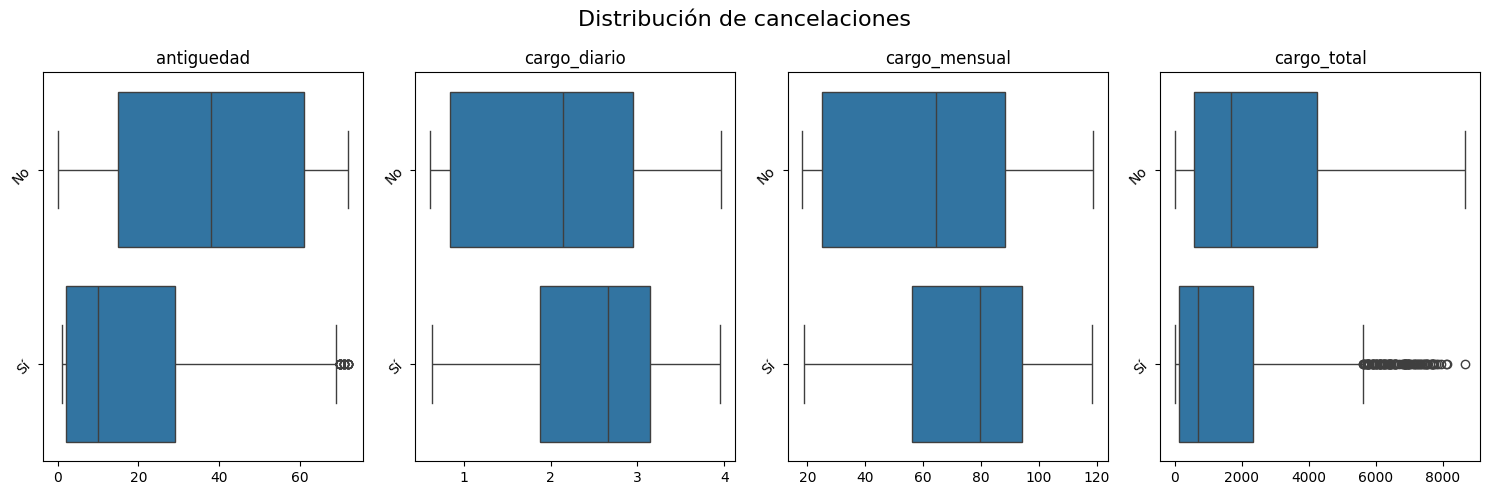

In [17]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes = axes.flatten()

columnas_num = ['antiguedad','cargo_diario','cargo_mensual', 'cargo_total']
fig.suptitle('Distribución de cancelaciones', fontsize=16)
for i, col in enumerate(columnas_num):
    sns.boxplot(data=dataFrame, y='evasión', x=col, ax=axes[i], orient='h')
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

    labels = [item.get_text() for item in axes[i].get_yticklabels()]
    nuevas_labels = [traducciones_ticks.get(l, l) for l in labels]

    # 2. FIJAR las posiciones primero (esto quita el Warning)
    axes[i].set_yticks(range(len(nuevas_labels)))

    # 3. ASIGNAR las etiquetas
    axes[i].set_yticklabels(nuevas_labels, rotation=45)


plt.tight_layout()
plt.show()


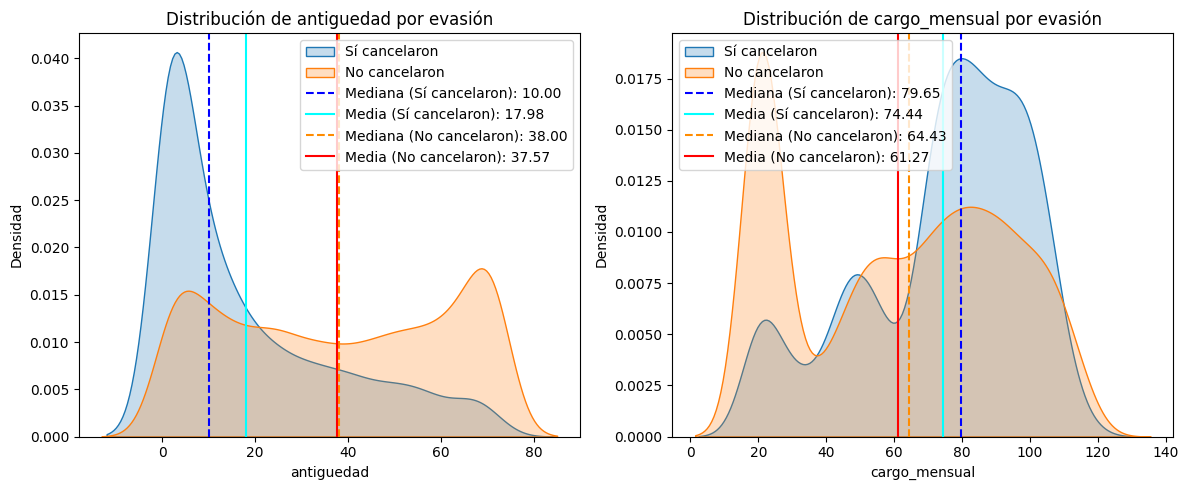

In [18]:
# Filtros
churned_customers = dataFrame[dataFrame['evasión'] == 1]
non_churned_customers = dataFrame[dataFrame['evasión'] == 0]

# Columnas numericas a graficar
numerical_cols = ['antiguedad', 'cargo_mensual']

# Graficos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.kdeplot(data=churned_customers, x=col, ax=axes[i], label='Sí cancelaron', fill=True)
    sns.kdeplot(data=non_churned_customers, x=col, ax=axes[i], label='No cancelaron', fill=True)

    # Calculo de meda y medianas
    # Clientes que cancelaron
    median_churned = churned_customers[col].median()
    mean_churned = churned_customers[col].mean()
    axes[i].axvline(median_churned, color='blue', linestyle='--', label=f'Mediana (Sí cancelaron): {median_churned:.2f}')
    axes[i].axvline(mean_churned, color='cyan', linestyle='-', label=f'Media (Sí cancelaron): {mean_churned:.2f}')


    # Clientes que no cancelaron
    median_non_churned = non_churned_customers[col].median()
    mean_non_churned = non_churned_customers[col].mean()
    axes[i].axvline(median_non_churned, color='darkorange', linestyle='--', label=f'Mediana (No cancelaron): {median_non_churned:.2f}')
    axes[i].axvline(mean_non_churned, color='red', linestyle='-', label=f'Media (No cancelaron): {mean_non_churned:.2f}')


    axes[i].set_title(f'Distribución de {col} por evasión')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Densidad')
    axes[i].legend()

plt.tight_layout()
plt.show()


#📊 Análisis de Correlación Adicional

In [19]:
# Creamos una columna temporal numérica para el cálculo
tiene_internet = dataFrame['internet'].map({'DSL': 1, 'Fiber optic': 1, 'No': 0}).astype(int)
columnas_a_sumar = [
    'servicio_telefónico', 'multiples_lineas', 'seguridad_online',
    'respaldo_en_la_nube', 'proteccion_de_dispositivo', 'soporte_tecnico',
    'streaming_TV', 'streaming_peliculas'
]

# Creamos la nueva columna
dataFrame['cantidad_servicios'] = dataFrame[columnas_a_sumar].sum(axis=1) + tiene_internet

# Verificamos los resultados
print(dataFrame['cantidad_servicios'].value_counts().sort_index())

cantidad_servicios
1    1264
2     859
3     846
4     965
5     922
6     908
7     676
8     395
9     208
Name: count, dtype: Int64


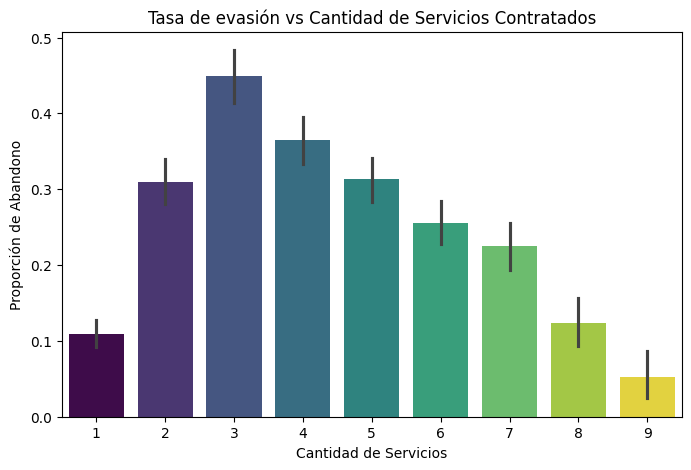

In [20]:
plt.figure(figsize=(8, 5))

# Corregido: asignamos x a hue y legend=False
sns.barplot(
    data=dataFrame,
    x='cantidad_servicios',
    y='evasión',
    hue='cantidad_servicios',
    palette='viridis',
    legend=False
)

plt.title('Tasa de evasión vs Cantidad de Servicios Contratados')
plt.xlabel('Cantidad de Servicios')
plt.ylabel('Proporción de Abandono')
plt.show()

#📄Informe final


##🔹 1. Introducción
El objetivo de este análisis es comprender las causas de la evasión de clientes en Telecom X. La empresa enfrenta una tasa de cancelación que impacta directamente en su rentabilidad. Identificar los patrones de comportamiento de los clientes que deciden abandonar el servicio es fundamental para que el equipo de Data Science desarrolle estrategias de retención proactivas y modelos de aprendizaje automático precisos.

##🔹 2. Limpieza y Tratamiento de Datos
Para asegurar la calidad de los hallazgos, se realizaron los siguientes pasos utilizando Python:

Carga de datos: Los datos se encuentran en el archivo "TelecomX_Data.json" y fueron cargados directamente desde la URL proporcionada utilizando la biblioteca pandas.

Conversión a DataFrame: Los datos JSON fueron convertidos a un DataFrame de Pandas para facilitar su manipulación y análisis.

Normalización de columnas anidadas: Las columnas con estructuras JSON anidadas (customer, phone, internet, account) fueron normalizadas y combinadas con el DataFrame principal.

Establecimiento del índice: La columna customerID se estableció como índice del DataFrame.

Conversión de tipo de datos: La columna Charges.Total fue convertida a tipo numérico (Float64), manejando los valores vacíos como NaN.

Creación de nueva columna: Se creó la columna Charges.Daily dividiendo Charges.Monthly por 30 para obtener el cargo diario.

Transformación de variables categóricas: Se realizaron transformaciones en columnas categóricas para convertirlas a formato numérico binario (0/1) donde fue apropiado (Churn, Partner, Dependents, PhoneService, etc.).

Identificación de valores únicos y nulos: Se exploraron los valores únicos en cada columna para identificar posibles inconsistencias.

Eliminación de filas: Se cuantificaron los valores desconocidos en la columna Churn y se estabelcio su eliminación, ya que no aportaban datos para este análisis.

##🔹 3. Análisis Exploratorio de Datos (EDA)
A través de las visualizaciones, se identificaron patrones claros que distinguen a los clientes que abandonan el servicio de aquellos que permanecen:

###Perfil Crítico de Evasión
Contratos y Pagos: El contrato "Mes a Mes" tiene la tasa de fuga más alta (42.7%), mientras que el método de pago por Cheque Electrónico alcanza un 45.3% de evasión.

Servicios: La Fibra Óptica presenta una tasa de cancelación del 41.9%, significativamente superior al DSL (19%).

Segmento Demográfico: Los Adultos Mayores tienen una propensión al abandono del 41.7%.

###Comportamiento Numérico
Antigüedad (Tenure): La mayoría de las cancelaciones ocurren en clientes con una mediana de tan solo 10 meses de permanencia.

Cargos Mensuales: Los clientes que cancelan tienen cargos mensuales más elevados (mediana de $79.65) en comparación con los que permanecen ($64.43).

Efecto Multi-servicio: Se descubrió que la tasa de abandono disminuye drásticamente a medida que el cliente contrata más de 4 servicios, alcanzando su punto mínimo con 9 servicios.

##🔹 4. Conclusiones e Insights
El costo es un factor clave: El churn está correlacionado positivamente con cargos mensuales altos.

Falta de compromiso: Los contratos a corto plazo y los métodos de pago manuales facilitan la salida del cliente.

Barreras de salida: Los clientes con múltiples servicios contratados son mucho menos propensos a abandonar, probablemente debido a la complejidad de migrar todos sus servicios a la competencia.

Calidad de Servicio: La alta tasa de fuga en Fibra Óptica sugiere que el servicio más caro no está cumpliendo las expectativas de los usuarios.

##🔹 5. Recomendaciones Estratégicas
Basado en el análisis de datos, se sugieren las siguientes acciones:

Fomentar la Multiactividad: Implementar descuentos por volumen para que los clientes contraten más de 4 servicios, aumentando así su lealtad.

Incentivos de Pago Automático: Ofrecer bonos únicos a clientes que cambien de "Cheque Electrónico" a pagos automáticos (Tarjeta/Transferencia).

Conversión de Contratos: Diseñar campañas para migrar a usuarios "Mes a Mes" hacia contratos anuales mediante beneficios exclusivos de permanencia.

Auditoría de Experiencia en Fibra: Realizar encuestas de satisfacción específicas para usuarios de Fibra Óptica para corregir problemas técnicos o de percepción de precio.